# Teil A

**Führen Sie die untenstehenden Python/Keras Anweisungen aus**

**Aufgabe A.1: Beantworten Sie dann folgende Fragen:**
- um welche Aufgabenstellung handelt es sich (Regression/Klassifikation/Clustering/...)
- Welche Dimensionen haben die Daten (Feature, Anzahl Sample, Größe Trainings/Testdaten)
- Wie ist Neuronalen Netzwerks aufgebaut? Wie sind die einzelnen Layer gewählt  (Anzahl Neuronen/Art Aktivierung)? 
- Wieviele Parameter müssen trainiert werden?
- Welches Verfahren wird wie für das Training benutzt (Algor. / Schrittweite/ Epochen/ Batch-size)?
- Wie wird die Performance des Modells analysiert?


**Aufgabe A.2: Wiederholen Sie die Experimente anschließend mit**
- Skalierten Daten
    - alle Feature auf Mittelwert 0 und Std.Abw 1 bringen
    - Tipp `np.mean()`, `np.std`
    - Skalierung $\to$ Ausgleich des Bias von großen im Vgl. zu kleinen Daten
        - Feature mit großem Wertebereich überschatten sonst Features mit kleinen
- Initialisierung Gewichte via `model.add(Dense( ..., kernel_initializer=HeNormal()))`
    - `kernel` $\hat=$ Matrix $\mathbf{W}$
- Stellen Sie eine Verbesserung fest?

In [4]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import matplotlib.pyplot as plt

(x_train,y_train), (x_test,y_test) = boston_housing.load_data()

num_features = x_train.shape[1]
num_target = 1

## Netzwerk definieren

In [5]:
model = Sequential()

model.add(Input(shape=(num_features,)))

model.add(Dense(units=16,activation="relu"))
model.add(Dense(units=16,activation="relu"))

model.add(Dense(units=num_target))

optimizer = RMSprop()
model.compile(
    loss="mse",
    optimizer=optimizer)

## Training

In [6]:
hist = model.fit(x=x_train,
    y=y_train,
    epochs=400,
    verbose=1,
    batch_size=64,
    validation_data=[x_test, y_test])

Epoch 1/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 16505.6426 - val_loss: 6882.2202
Epoch 2/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4923.8418 - val_loss: 2199.6382
Epoch 3/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1358.3799 - val_loss: 587.4924
Epoch 4/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 348.8899 - val_loss: 219.9550
Epoch 5/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 175.8184 - val_loss: 135.3126
Epoch 6/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.3131 - val_loss: 100.9417
Epoch 7/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 97.9440 - val_loss: 91.7005
Epoch 8/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 93.3861 - val_loss: 84.1606
Epoch 9/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88.6742 - val_loss: 79.5772
Epoch 10/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.2350 - val_loss: 81.4146
Epoch 11/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.2526 - val_loss: 72.1253
Epoch 12/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7

## Auswertung

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.2485 
Score:  33.48861312866211


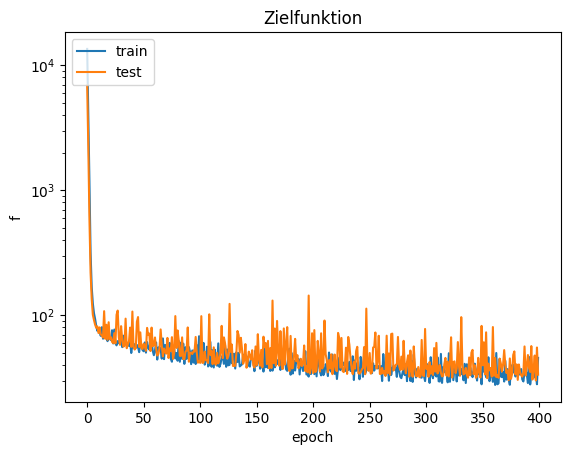

In [7]:
score=model.evaluate(x_test, y_test)

print("Score: ", score)
plt.semilogy(hist.history['loss'])
plt.semilogy(hist.history['val_loss'])
plt.title('Zielfunktion')
plt.ylabel('f')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

- Verbesserung auf Test-Daten stagniert irgendwann
- also keine Verbesserung bei Generalisierungsfähigkeit

## Aufgabe A1

### Aufgabenstellung

> Um welche Aufgabenstellung handelt es sich (Regression/Klassifikation/Clustering/...)?

```py
model.add(Input(shape=(num_features,)))
model.add(Dense(units=16,activation="relu"))
model.add(Dense(units=16,activation="relu"))
model.add(Dense(units=num_target))
```

- Output-Layer: keine Aktivierung, d.h. keine Einschränkung
- Betrachtung der `y`-Werte ebenfalls möglich
    - sind beliebige reelle Werte
- weiterer Hinweis: Mean Squared Error
- Regression für einen Wert

### Dimensionen

> Welche Dimensionen haben die Daten (Feature, Anzahl Sample, Größe Trainings/Testdaten)

In [23]:
print(f'Dim. Feature: {x_test.shape[1:]}')
print(f'#Sample:      {x_test.shape[0] + x_train.shape[0]}')
print(f'Größe Train:  {x_train.shape}')
print(f'Größe Test:   {x_test.shape}')

Dim. Feature: (13,)
#Sample:      506
Größe Train:  (404, 13)
Größe Test:   (102, 13)


ungefähr 90/20 Aufteilung

### Aufbau Netz

> Wie ist Neuronalen Netzwerks aufgebaut? Wie sind die einzelnen Layer gewählt (Anzahl Neuronen / Art Aktivierung)?

```py
model.add(Input(shape=(num_features,)))

model.add(Dense(units=16,activation="relu"))
model.add(Dense(units=16,activation="relu"))

model.add(Dense(units=num_target))
```

- Schichten:
    - Input-Layer mit 13 Neuronen ($\hat=$ Feature-Dimension)
    - 2 Hidden-Layer mit je 16 Neuronen und ReLu-Aktivierung
    - Output-Layer mit 1 Neuron, d.h. Ausgabe ist ein Wert

`input(13) --> relu(16) --> relu(16) --> output(1)`

### Parameter

> Wie viele Parameter müssen trainiert werden?

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028 (4.02 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 515 (2.02 KB)

Insgesamt gibt es 1.028 Parameter, von denen $224+272+17=513$ trainiert werden müssen.

### Verfahren für Training

> Welches Verfahren wird wie für das Training benutzt (Algor. / Schrittweite/ Epochen/ Batch-size)?

```py
optimizer = RMSprop()
model.compile(
    loss="mse",
    optimizer=optimizer)
```

- Verlustfunktion `mse`, d.h. *Mean Squared Error*
- Verwendung `RMSprop`, d.h. *Root Mean Squared Propagation*
    - Erweiterung von GD und AdaGrad
    - siehe [Medium](https://medium.com/thedeephub/what-is-rmsprop-0f54effc47e4) Artikel
- 400 Epochen
- Batch-Size von 64
- adaptive Schrittweite

### Performance-Analyse

> Wie wird die Performance des Modells analysiert?

```py
model.compile(
    loss="mse", # <--
    optimizer=optimizer)

hist = model.fit(x=x_train,
    y=y_train,
    epochs=400,
    verbose=1,
    batch_size=64,
    validation_data=[x_test, y_test]) # <--
```

- Daten-Basis: **Test**-Daten
    - wichtig für Generalisierungsfähigkeit
- Wert der Ziel- / Verlustfunktion (`mse`) Mean Squared Error